In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','hourse','ship','truck']

In [ ]:
classes[1]

'automobile'

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_train[0,0]

6

In [ ]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
y_train[1,0]

9

In [ ]:
classes[y_train[0,0]]

'frog'

In [ ]:
y_train[1,0]

9

In [ ]:
def plot_sample(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classes[y[index,0]])

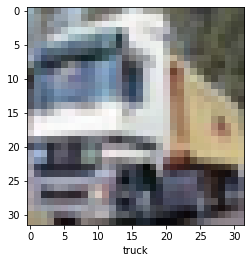

In [ ]:
plot_sample(x_train,y_train,1)

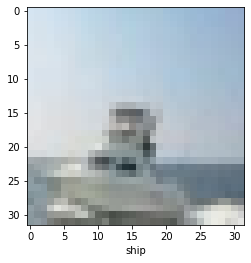

In [ ]:
plot_sample(x_train,y_train,100)

In [ ]:
#converting pixels into 0-1
x_train,x_test=x_train/255,x_test/255

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu',))
model.add(layers.MaxPooling2D((2,2)))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
model.compile(optimizer='adam',
              loss=['sparse_categorical_crossentropy'],
              metrics=['accuracy'])
history=model.fit(x_train,y_train, epochs=25, validation_data=(x_test,y_test))

Epoch 1/25
1563/1563 [==============================] - 19s 4ms/step - loss: 1.5865 - accuracy: 0.4195 - val_loss: 1.3136 - val_accuracy: 0.5293
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2088 - accuracy: 0.5664 - val_loss: 1.1558 - val_accuracy: 0.5853
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0619 - accuracy: 0.6259 - val_loss: 1.0490 - val_accuracy: 0.6273
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9617 - accuracy: 0.6632 - val_loss: 1.0004 - val_accuracy: 0.6520
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8925 - accuracy: 0.6859 - val_loss: 0.9491 - val_accuracy: 0.6685
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8297 - accuracy: 0.7098 - val_loss: 0.9198 - val_accuracy: 0.6845
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7847 - accuracy: 0.7279 - val_loss: 0.9276 - val_accuracy

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0952 - accuracy: 0.7102


[1.0951634645462036, 0.7102000117301941]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=model.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report:\n', classification_report(y_test,y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      1000
           1       0.80      0.81      0.81      1000
           2       0.64      0.59      0.62      1000
           3       0.57      0.51      0.54      1000
           4       0.64      0.68      0.66      1000
           5       0.62      0.64      0.63      1000
           6       0.78      0.77      0.78      1000
           7       0.76      0.71      0.74      1000
           8       0.80      0.82      0.81      1000
           9       0.71      0.84      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



NameError: ignored

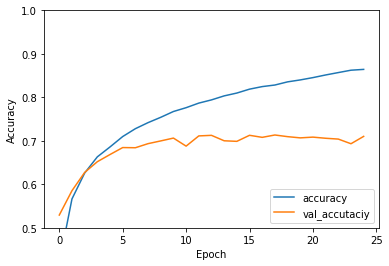

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accutaciy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loass, test_accuracy= model.evaluate(test_image, test_labels, verbose=2)